# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
lat = []
long =[]
max_temp =[]
humidity =[]
clouds =[]
wind =[]
cntry = []
date =[] 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
print('Begin Data Retreival')
print('----------------------------')
for index , city in enumerate(cities, start=1):
    try:
        query_url = url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city
        response = requests.get(query_url)
        print(f"Processing Weather Data {index} | {city}")
        city_name.append(response.json()['name'])
        lat.append(response.json()['coord']['lat'])
        long.append(response.json()['coord']['lon'])
        max_temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        clouds.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])
        cntry.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        
    except:
        print('City Not Found. Skipping to next city')
print('----------------------------')
print('End of Data Retrieval')
   
     
    

Begin Data Retreival
----------------------------
Processing Weather Data 1 | geraldton
Processing Weather Data 2 | kentau
Processing Weather Data 3 | mokhotlong
Processing Weather Data 4 | kapaa
Processing Weather Data 5 | tornio
Processing Weather Data 6 | san jeronimo
Processing Weather Data 7 | busselton
Processing Weather Data 8 | suseni
Processing Weather Data 9 | barentsburg
City Not Found. Skipping to next city
Processing Weather Data 10 | albany
Processing Weather Data 11 | salekhard
Processing Weather Data 12 | punta arenas
Processing Weather Data 13 | myrtle beach
Processing Weather Data 14 | bluff
Processing Weather Data 15 | tsihombe
City Not Found. Skipping to next city
Processing Weather Data 16 | orapa
Processing Weather Data 17 | atuona
Processing Weather Data 18 | tilichiki
Processing Weather Data 19 | pevek
Processing Weather Data 20 | bafoulabe
Processing Weather Data 21 | amderma
City Not Found. Skipping to next city
Processing Weather Data 22 | taolanaro
City Not 

Processing Weather Data 193 | bredasdorp
Processing Weather Data 194 | lorengau
Processing Weather Data 195 | saint-francois
Processing Weather Data 196 | byron bay
Processing Weather Data 197 | sinnai
Processing Weather Data 198 | molteno
Processing Weather Data 199 | cidreira
Processing Weather Data 200 | namibe
Processing Weather Data 201 | tevaitoa
Processing Weather Data 202 | key west
Processing Weather Data 203 | sorong
Processing Weather Data 204 | ruatoria
City Not Found. Skipping to next city
Processing Weather Data 205 | muroran
Processing Weather Data 206 | kaitangata
Processing Weather Data 207 | laje
Processing Weather Data 208 | kashary
Processing Weather Data 209 | mys shmidta
City Not Found. Skipping to next city
Processing Weather Data 210 | mackay
Processing Weather Data 211 | el playon
Processing Weather Data 212 | umzimvubu
City Not Found. Skipping to next city
Processing Weather Data 213 | knysna
Processing Weather Data 214 | rocha
Processing Weather Data 215 | ha

Processing Weather Data 385 | bengkulu
Processing Weather Data 386 | mehamn
Processing Weather Data 387 | vestmanna
Processing Weather Data 388 | san cristobal
Processing Weather Data 389 | coihaique
Processing Weather Data 390 | hue
Processing Weather Data 391 | oromocto
Processing Weather Data 392 | borogontsy
Processing Weather Data 393 | diu
Processing Weather Data 394 | conakry
Processing Weather Data 395 | ewa beach
Processing Weather Data 396 | kurumkan
Processing Weather Data 397 | valparaiso
Processing Weather Data 398 | tabiauea
City Not Found. Skipping to next city
Processing Weather Data 399 | krasnoborsk
Processing Weather Data 400 | lavrentiya
Processing Weather Data 401 | abbeville
Processing Weather Data 402 | nizhneangarsk
Processing Weather Data 403 | sibu
Processing Weather Data 404 | san lorenzo
Processing Weather Data 405 | parkes
Processing Weather Data 406 | waingapu
Processing Weather Data 407 | catalina
Processing Weather Data 408 | nakatsugawa
Processing Weath

Processing Weather Data 579 | chumikan
Processing Weather Data 580 | sepolno krajenskie
Processing Weather Data 581 | pushkinskiye gory
Processing Weather Data 582 | bilma
Processing Weather Data 583 | ngama
Processing Weather Data 584 | keene
Processing Weather Data 585 | hay river
Processing Weather Data 586 | luwuk
Processing Weather Data 587 | tawnat
City Not Found. Skipping to next city
Processing Weather Data 588 | port moresby
Processing Weather Data 589 | tyubuk
Processing Weather Data 590 | otacilio costa
Processing Weather Data 591 | tabas
Processing Weather Data 592 | shelburne
Processing Weather Data 593 | nyurba
Processing Weather Data 594 | ormara
Processing Weather Data 595 | poum
Processing Weather Data 596 | pontes e lacerda
Processing Weather Data 597 | cam ranh
Processing Weather Data 598 | abu dhabi
Processing Weather Data 599 | kokopo
Processing Weather Data 600 | gualeguay
Processing Weather Data 601 | kumasi
Processing Weather Data 602 | verkhnyaya inta
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({'City Name': city_name,
     'Lat':lat,
     'Lon': long,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness':clouds,
     'Wind Speed':wind,
     'Country':cntry,
     'Date':date})
df.set_index('City Name', inplace = True)
display(df)

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Geraldton,-28.7667,114.6000,25.00,31,0,7.72,AU,1618458471
Kentau,43.5206,68.5094,15.74,49,54,5.47,KZ,1618458471
Mokhotlong,-29.2894,29.0675,9.22,58,4,0.32,LS,1618458472
Kapaa,22.0752,-159.3190,23.00,73,75,8.23,US,1618458472
Tornio,65.8481,24.1466,-2.00,74,0,4.12,FI,1618458473
...,...,...,...,...,...,...,...,...
Sire,12.9299,5.2043,27.03,8,83,3.55,NG,1618458804
Guamal,9.1433,-74.2238,25.75,89,100,0.72,CO,1618458805
Zhangye,38.9342,100.4517,8.51,19,1,0.58,CN,1618458805


In [5]:
df.to_csv(path_or_buf = output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_af = df[df['Humidity']> 100 ]
humid_af

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [7]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [8]:
clean_city_data = df[df['Humidity']<= 100] 

In [9]:
display(clean_city_data)
display(clean_city_data.describe())

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Geraldton,-28.7667,114.6000,25.00,31,0,7.72,AU,1618458471
Kentau,43.5206,68.5094,15.74,49,54,5.47,KZ,1618458471
Mokhotlong,-29.2894,29.0675,9.22,58,4,0.32,LS,1618458472
Kapaa,22.0752,-159.3190,23.00,73,75,8.23,US,1618458472
Tornio,65.8481,24.1466,-2.00,74,0,4.12,FI,1618458473
...,...,...,...,...,...,...,...,...
Sire,12.9299,5.2043,27.03,8,83,3.55,NG,1618458804
Guamal,9.1433,-74.2238,25.75,89,100,0.72,CO,1618458805
Zhangye,38.9342,100.4517,8.51,19,1,0.58,CN,1618458805


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.051053,17.216841,15.067957,68.852575,52.397869,3.398650,1.618459e+09
std,33.712199,91.844538,11.857361,22.348373,38.216346,2.397889,1.166227e+02
min,-54.800000,-179.166700,-25.040000,7.000000,0.000000,0.160000,1.618458e+09
25%,-8.881700,-65.162150,6.265000,57.500000,17.500000,1.685000,1.618459e+09
50%,22.890900,23.127400,16.800000,73.000000,54.000000,2.720000,1.618459e+09
75%,48.851450,95.321800,25.000000,87.000000,90.000000,4.540000,1.618459e+09
max,78.218600,178.416700,36.010000,100.000000,100.000000,15.000000,1.618459e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

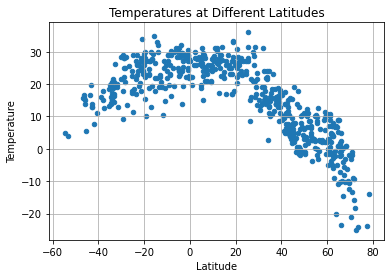

In [10]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Max Temperature', grid = True)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperatures at Different Latitudes');

## Latitude vs. Humidity Plot

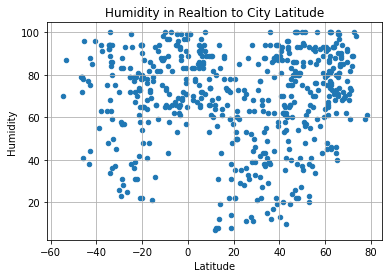

In [11]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Humidity', grid = True)
plt.xlabel('Latitude')
plt.title('Humidity in Realtion to City Latitude');

## Latitude vs. Cloudiness Plot

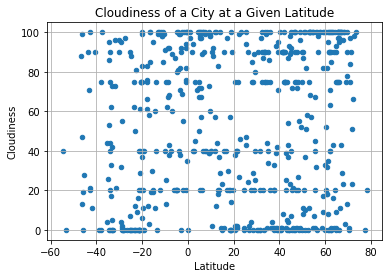

In [12]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Cloudiness', grid = True)
plt.xlabel('Latitude')
plt.title('Cloudiness of a City at a Given Latitude');

## Latitude vs. Wind Speed Plot

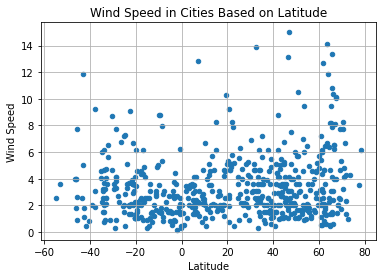

In [13]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Wind Speed', grid = True)
plt.xlabel('Latitude')
plt.title('Wind Speed in Cities Based on Latitude');

## Linear Regression

In [14]:
north = clean_city_data[clean_city_data['Lat']>=0]
south =  clean_city_data[clean_city_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: -0.8814936850332977


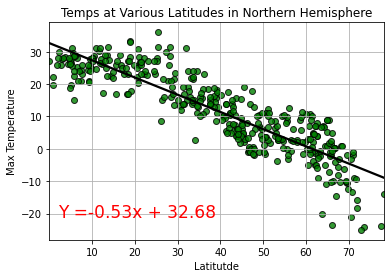

In [15]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Max Temperature'])

sns.regplot(x=north['Lat'], y = north['Max Temperature'],
            scatter_kws={"color": "green", 'edgecolors': 'black'},line_kws={"color": "black"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,-21, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Red')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R_value is: 0.6200751397700818


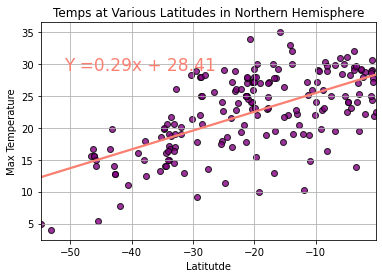

In [16]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Max Temperature'])

sns.regplot(x=south['Lat'], y = south['Max Temperature'],
            scatter_kws={"color": "purple", 'edgecolors': 'Black'},line_kws={"color":"salmon"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(-51,29, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'salmon')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R_value is: 0.15623054290096755


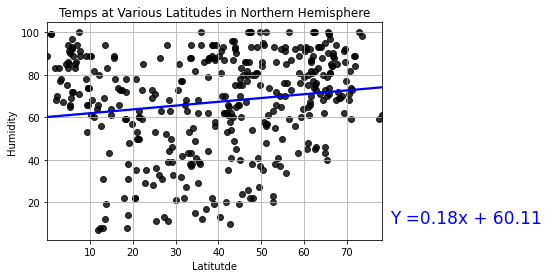

In [26]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Humidity'])

sns.regplot(x=north['Lat'], y = north['Humidity'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(80,10, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R_value is: 0.1356508238034114


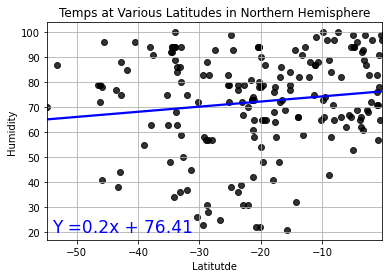

In [31]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Humidity'])

sns.regplot(x=south['Lat'], y = south['Humidity'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Humidity at Various Latitudes in Northern Hemisphere')
plt.text(-54,20, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R_value is: 0.03480576690236943


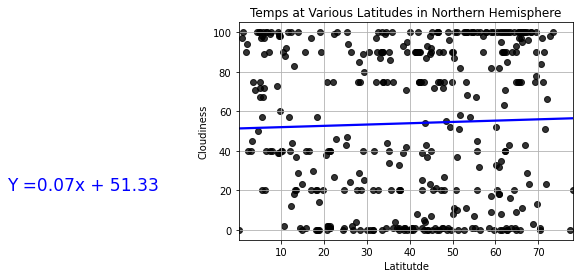

In [32]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Cloudiness'])

sns.regplot(x=north['Lat'], y = north['Cloudiness'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(-54,20, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R_value is: 0.28411432338553727


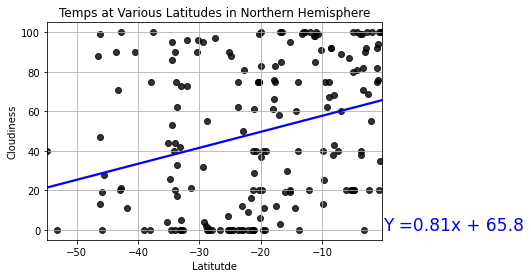

In [35]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Cloudiness'])

sns.regplot(x=south['Lat'], y = south['Cloudiness'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(0,0, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R_value is: 0.17081853864518526


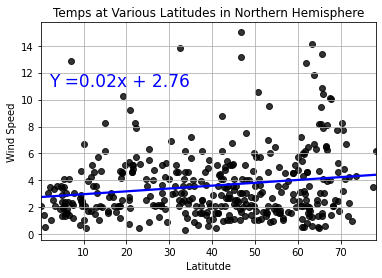

In [41]:
slope, intercept, r_value, p_value, std_err = linregress(x = north['Lat'],y = north['Wind Speed'])

sns.regplot(x=north['Lat'], y = north['Wind Speed'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,11, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R_value is: -0.22524561643460442


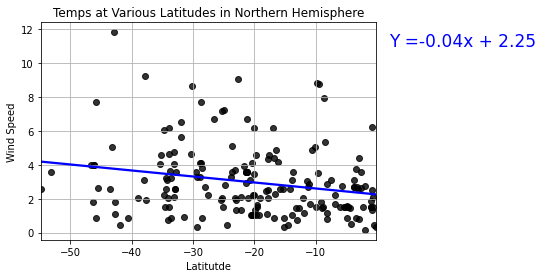

In [43]:
slope, intercept, r_value, p_value, std_err = linregress(x = south['Lat'],y = south['Wind Speed'])

sns.regplot(x=south['Lat'], y = south['Wind Speed'],
            scatter_kws={"color": "Black", 'edgecolors': 'Black'},line_kws={"color":"Blue"}, ci=0)
plt.grid()
plt.xlabel('Latitutde')
plt.title('Temps at Various Latitudes in Northern Hemisphere')
plt.text(2,11, f'Y ={slope.round(2)}x + {intercept.round(2)}', fontsize = 17, color = 'Blue')
print(f'The R_value is: {r_value}')
